## Bike Rentals

The dataset contains information from hour/day bike rentals in the city of Washington, D.C among other cities.

There are 17,380 rows, and each row represents bike rentals for a single hour in a single day.

dataset: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The goal is to predict the target column: 'cnt' using all other features, except for 'casual' and 'registered'.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv('hour.csv')
print(data.shape)
data.head(3)

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


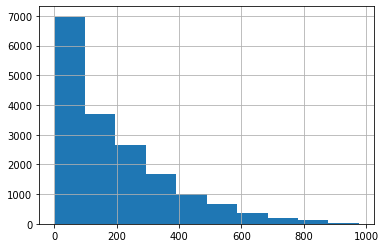

In [35]:
# Histogram of target 'cnt'
data.cnt.hist()

In [36]:
# Correlation of target 'cnt' with other features
data.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

The feature most correlated with 'cnt' is 'registered'. It is almost perfectly correlated.

### Pre-processing

Need to change the 'hr' column into features that can be fed into the algorithm

In [37]:
# Function assigns a value for different hour times
def assign_label(num):
    if (num>6)&(num<=12):
        return 1
    elif (num>12)&(num<=18):
        return 2
    elif (num>18)&(num<=24):
        return 3
    elif (num>=0)&(num<=6):
        return 4

In [38]:
# Apply function to 'hr' column
data['time_label'] = data.hr.apply(assign_label)

In [39]:
data.shape

(17379, 18)

In [40]:
# Split data using Pandas Sample at 80%
train = data.sample(frac = 0.8, random_state=1)
test = data.drop(train.index)

In [41]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (13903, 18)
Test shape:  (3476, 18)


In [42]:
## Different approach to finding test
# Mask of index in train
mask = data.index.isin(train.index)
test2 = data.loc[~data.index.isin(train.index)].shape

## Fitting Linear Model

"casual" and "registered" correlate with the target column "cnt", and so we need to take those features out before fitting the model.

In [45]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [47]:
# List of features to EXCLUDE
columns = ["casual", "dteday", "registered", "hr"]
train = train.drop(columns, axis=1)
test = test.drop(columns, axis=1)

In [50]:
features = train.columns.drop('cnt')

In [53]:
lr = LinearRegression()
lr.fit(train[features], train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
prediction = lr.predict(test[features])

#### Trying MSE, RMSE, and MAE

In [58]:
mse = mean_squared_error(test['cnt'], prediction)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
mae = mean_absolute_error(test['cnt'], prediction)
print('MAE: ', mae)

MSE:  17047.37019714863
RMSE:  130.56557814810392
MAE:  98.52502572038904


## Fitting Decision Trees

In [66]:
# Model
tree = DecisionTreeRegressor()
# Fitting
tree.fit(train[features], train['cnt'])
prediction = tree.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
mae = mean_absolute_error(test['cnt'], prediction)
print('MAE: ', mae)

MSE:  15360.629459148446
RMSE:  123.93800651595315
MAE:  78.71288837744534


#### Tweaking parameters

In [68]:
# Model
tree = DecisionTreeRegressor(min_samples_leaf=10)
# Fitting
tree.fit(train[features], train['cnt'])
prediction = tree.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
mae = mean_absolute_error(test['cnt'], prediction)
print('MAE: ', mae)

MSE:  11725.09344585633
RMSE:  108.28247063055187
MAE:  73.77310699967585


## Fitting Random Forest

In [73]:
# Model 
forest = RandomForestRegressor()
# Fitting
forest.fit(train[features], train['cnt'])
prediction = forest.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
mae = mean_absolute_error(test['cnt'], prediction)
print('MAE: ', mae)

MSE:  10194.735701956271
RMSE:  100.96898386116536
MAE:  67.20863060989643


In [75]:
# Model 
forest = RandomForestRegressor(min_samples_leaf=10)
# Fitting
forest.fit(train[features], train['cnt'])
prediction = forest.predict(test[features])
mse = mean_squared_error(test['cnt'], prediction)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
mae = mean_absolute_error(test['cnt'], prediction)
print('MAE: ', mae)

MSE:  10767.190092986571
RMSE:  103.76507164256464
MAE:  70.92630658163245
